## Advance House Price Prediction

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

### Exploratory Data Analysis

- Here we try to understand the data.

### Life Cycle of the project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment


In [14]:
##Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##To display all the columns and rows of the dataframe

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [15]:
dataset = pd.read_csv('train.csv')

In [16]:
dataset.shape

(1460, 81)

In [17]:
dataset.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [18]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In data analysis we try to find out the below

- Missing Values
- All the numerical features
- Distribution of the numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent   feature(SalePrice)

In [19]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [20]:
##Here we are checking the percentage of null values in each feature
##making the list of features which har nan values

features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

##Printing feature name and the percentage of missing values

for feature in features_nan:
    print(feature,round(dataset[feature].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


Since there are many missing values, we need to find the relationship between the missing values and Sales Price.

Let's Plot Some diagram for this relationship

In [21]:
features_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

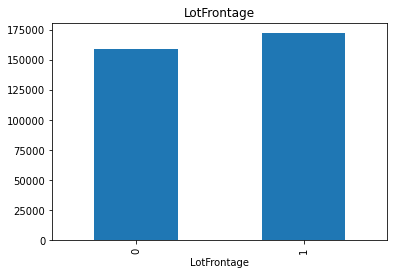

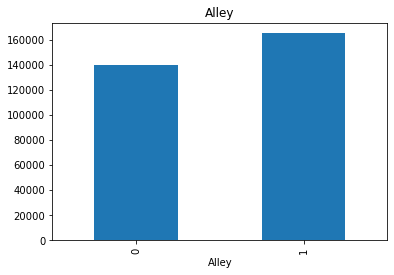

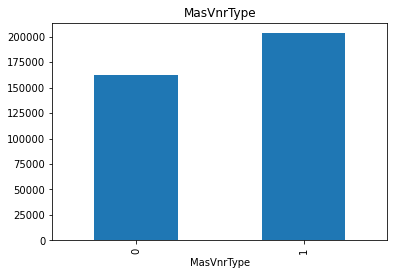

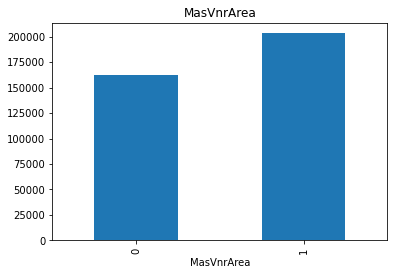

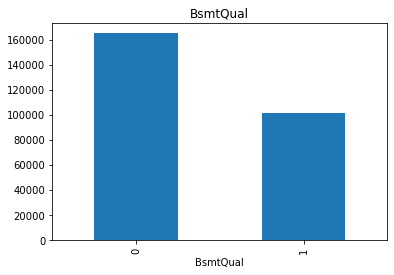

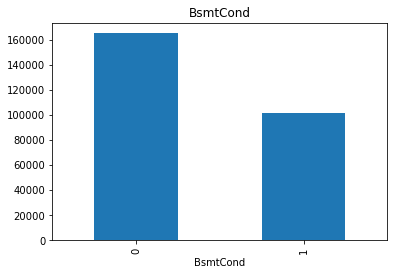

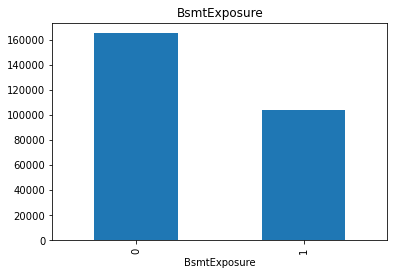

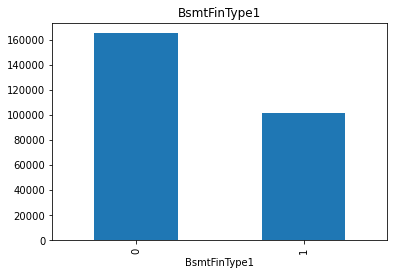

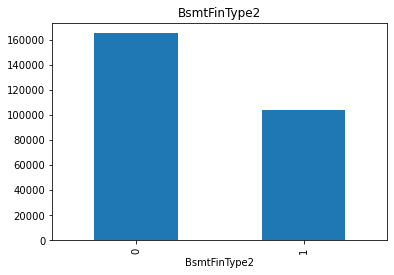

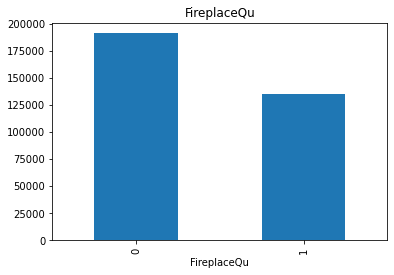

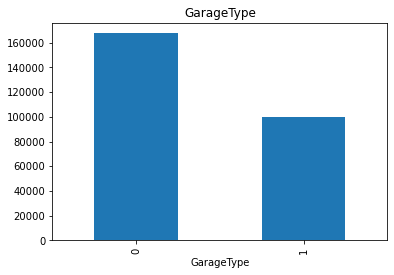

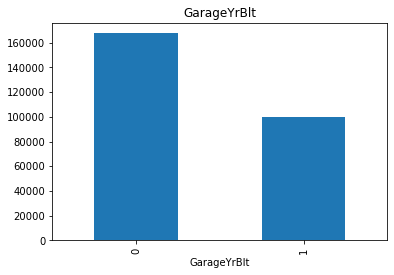

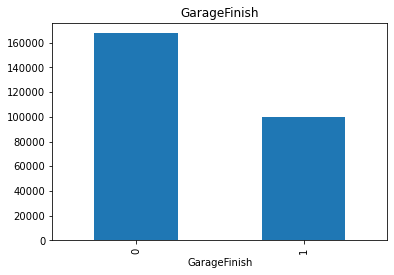

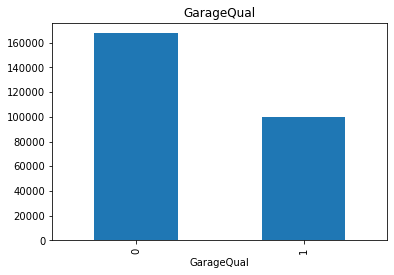

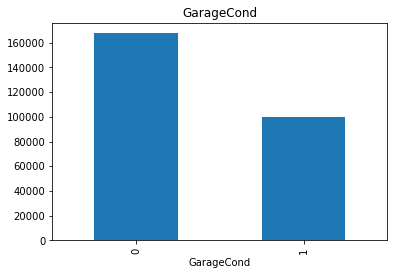

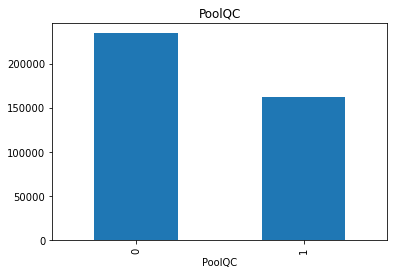

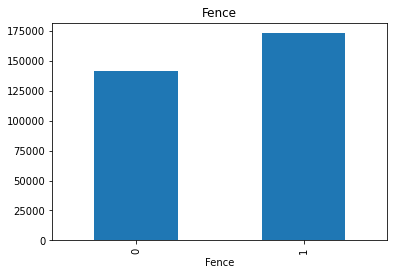

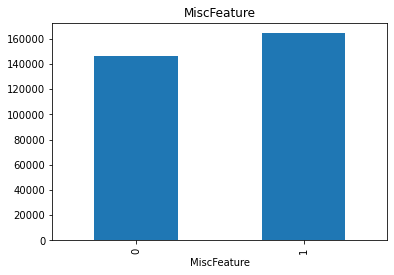

In [22]:
for feature in features_nan:
    data = dataset.copy()
    
    ##Creating a new variable indicating 1 if the observation is missing in the feature
    data[feature]=np.where(data[feature].isnull(),1,0)
    ##Creating the plot that indictes the impact of missing values on the Sales Price
    df=data.groupby(feature)['SalePrice'].median()
    df.plot.bar()
    plt.title(feature)
    plt.show()
    

In [23]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

Here with the relation between the missing values and the dependent variable is clearly visible. So we need to replace these nan values with something meaningful which we do in the Feature Engineering section.

From the above dataset some of the features like Id is not required because of the too many unique values.

In [24]:
print('ID of Houses {}'.format(dataset['Id'].nunique()))

ID of Houses 1460


## Numerical Variables

In [25]:
##List of numerical variables

numerical_variables = [feature for feature in dataset.columns if dataset[feature].dtypes!='O']

print('Number of numerical variables:', len(numerical_variables))

dataset[numerical_variables].head()

Number of numerical variables: 38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

### Temporal Variable (eg: Datetime Variable)

From the dataset we have 4 year variables. We have extract information from the datetime variables like no.of years or no.of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering.

In [26]:
##list of variables that contain year information

year_feature = [feature for feature in numerical_variables if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [27]:
##checking for the unique values in the year variables

for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Year sold vs Price')

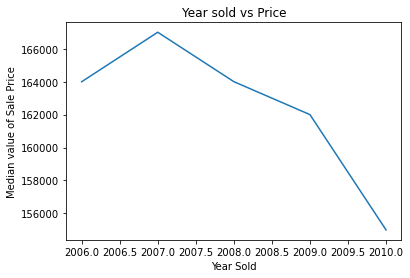

In [28]:
##leta analyse the Temporal Datetime variables
##We wil check whether there is a relation between year the house is sold and the sales price

df = dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median value of Sale Price')
plt.title('Year sold vs Price')

In the most recent years the price of the house should be high but here in the recent times the price of the house decreases.

In [29]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

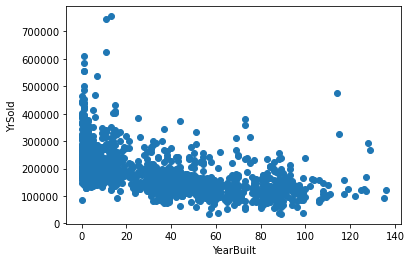

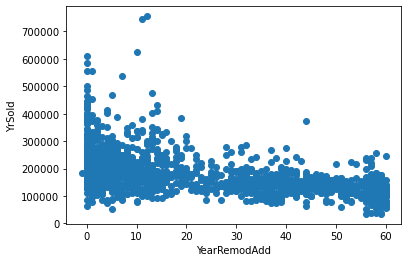

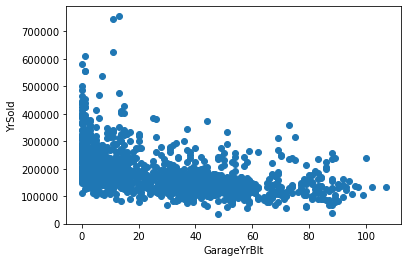

In [31]:
##Here we want to know relation of all the year features with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data = dataset.copy()
        #here capturing the relationship between year variable and year sold
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('YrSold')
        plt.show()

In [37]:
numerical_variables

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [39]:
##Seperating the continous and discrete numerical variables

##Discrete variables- here considering the variables with <25 as discrete

discrete_features = [feature for feature in numerical_variables if (len(dataset[feature].unique())<25) and (feature not in year_feature+['Id'])]

print('Discrete value count: {}'.format(len(discrete_features)))

Discrete value count: 17


In [40]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [41]:
dataset[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

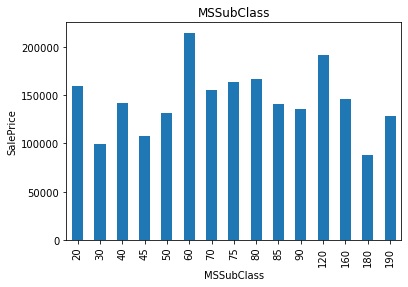

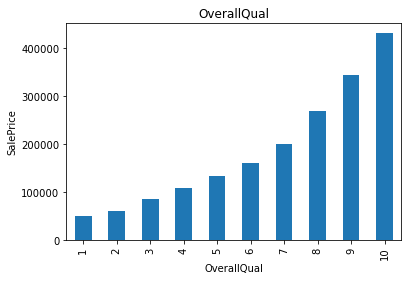

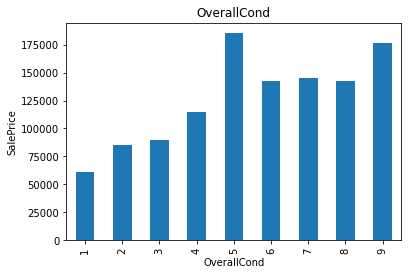

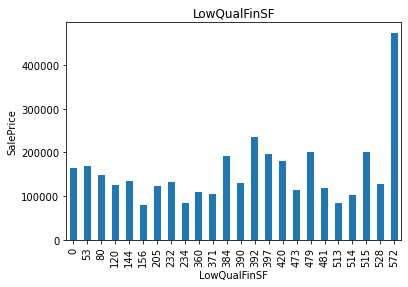

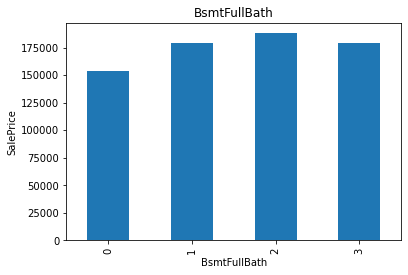

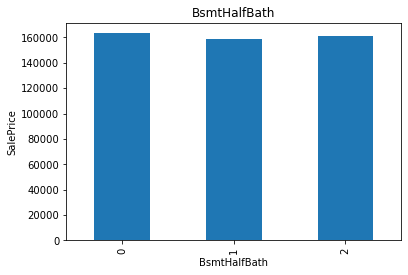

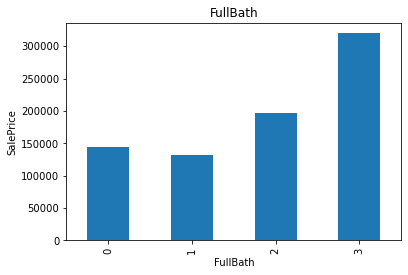

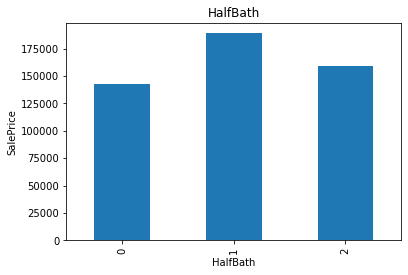

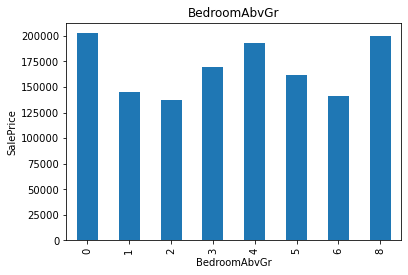

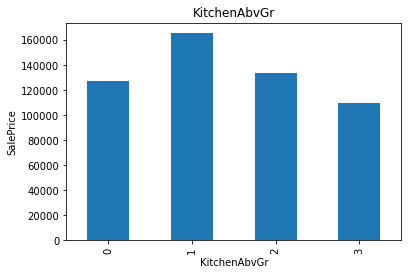

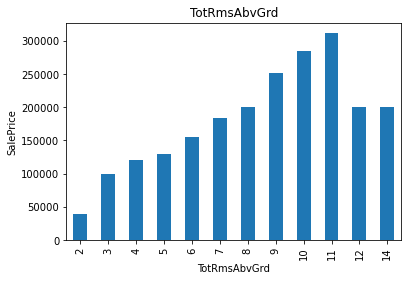

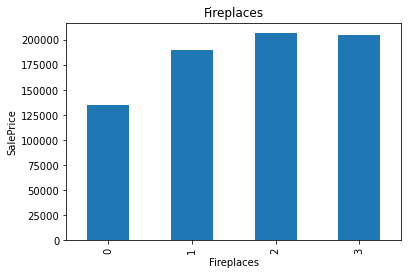

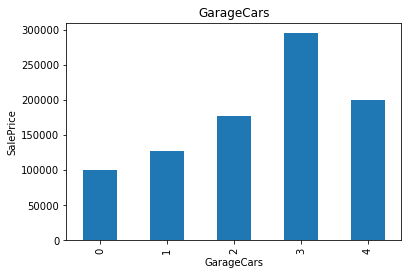

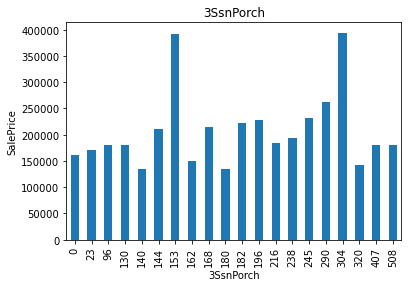

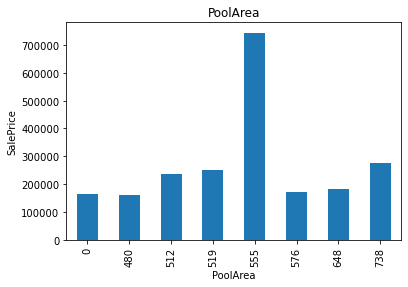

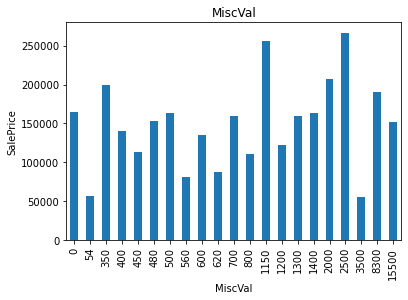

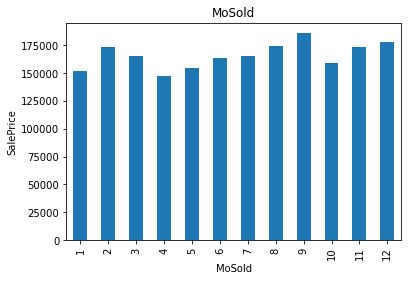

In [43]:
##Finding the relationship between discrete variables and Sale Price

for feature in discrete_features:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Some of the variables are showing the constant increse in price of the house.

In [44]:
##Analysing the relationship between contionus features and Sold Price

continous_feature = [feature for feature in numerical_variables if feature not in discrete_features+year_feature+['Id']]

print('Continuous feature count {}'.format(len(continous_feature)))

Continuous feature count 16


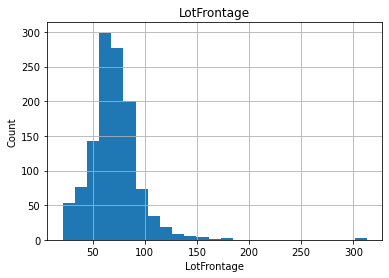

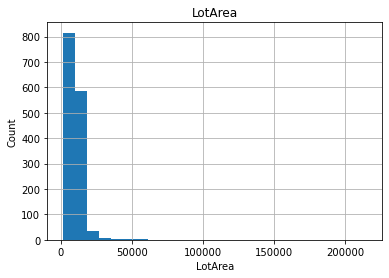

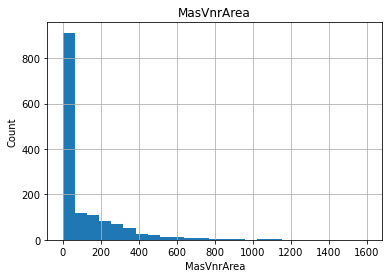

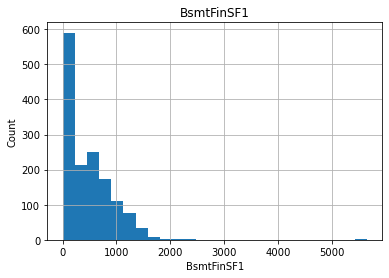

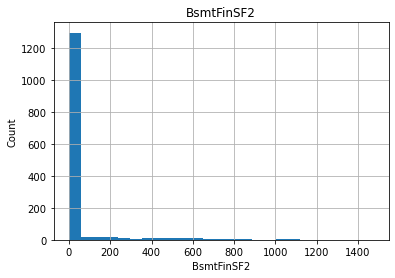

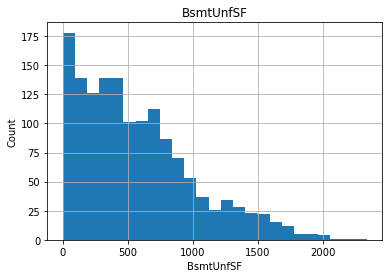

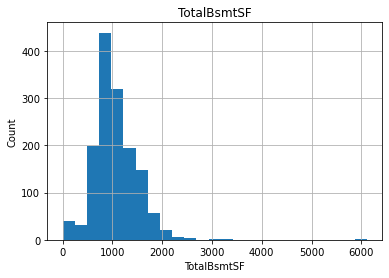

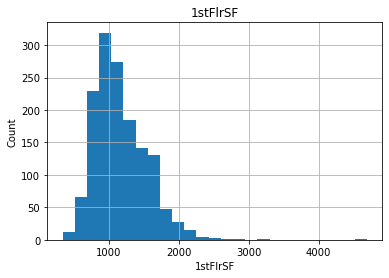

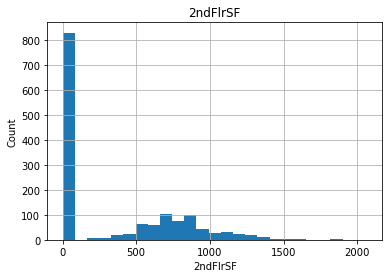

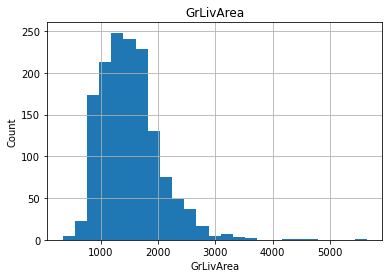

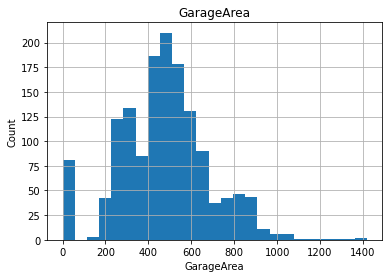

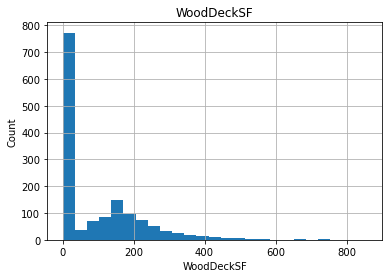

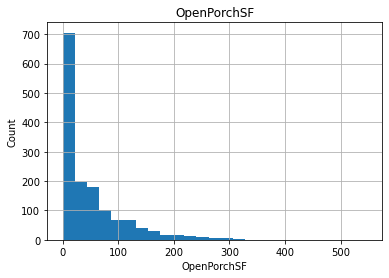

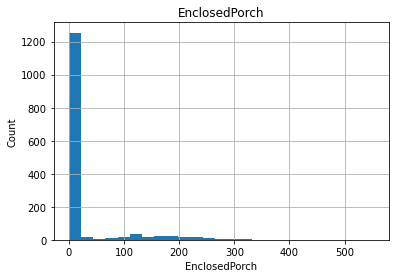

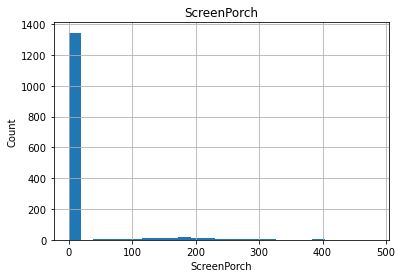

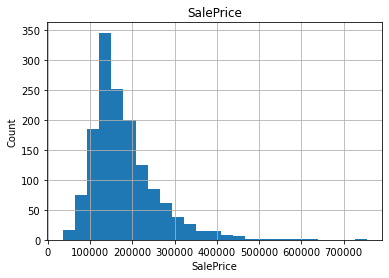

In [46]:
#Analysing the distribution of contionus variables

for feature in continous_feature:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()